Import dataset from kaggle <br>
File location: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('drive/MyDrive/credit_risk_dataset.csv')

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Let's learn a bit about our dataset. Starting off with the size of the dataset, the % of each variable that's missing, the type of each variable.

In [ ]:
print("\nShape of dataset")
print(np.shape(data))
print("Percentage of each variable missing")
print(data.isna().sum()/ np.shape(data)[0])
print("\nVariable Type")
print(data.dtypes)


Shape of dataset
(32581, 12)
Percentage of each variable missing
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

Variable Type
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_his

For ease of doing this exercise let's drop any row that has a missing value - looks like it shouldn't affect our dataset too much.

In [ ]:
data = data.dropna()

In [ ]:
print("\nNew shape of dataset")
print(np.shape(data))


New shape of dataset
(28638, 12)


We probably could have augmented the missing values w/ either the missing values of the dataset, or augmented after the train-test split with the average values from the training set, however we'll just roll with dropping the rows.

In [ ]:
y = data['loan_status'].values
X = data.drop(['loan_status'], axis = 1).values

In [ ]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

#Dealing with the categorical home_ownership column
onehotencoder = make_column_transformer((OneHotEncoder(), [2]), remainder='passthrough')
X = onehotencoder.fit_transform(X)

#Removing the extra dummy variable
X = X[:, 1:]

In [ ]:

#Dealing with the categorical loan_intent column
onehotencoder = make_column_transformer((OneHotEncoder(), [6]), remainder='passthrough')
X = onehotencoder.fit_transform(X)

#Removing the extra dummy variable
X = X[:, 1:]

In [ ]:

#Dealing with the categorical loan_grade column
onehotencoder = make_column_transformer((OneHotEncoder(), [11]), remainder='passthrough')
X = onehotencoder.fit_transform(X)

#Removing the extra dummy variable
X = X[:, 1:]

In [ ]:
#Label Encoding cb_person_default_on_file
labelencoder_X = LabelEncoder()
X[:, 20] = labelencoder_X.fit_transform(X[:, 20])

In [ ]:
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

For classifying the binary variable of loan status there are a few different approaches we can take. There are a plethora of classic machine learning models we can use, we can use some deep learning models, or we could use some statistical models. We'll start with classic ML models

#Logistic Regression Model

In [ ]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
logreg_class_Obj = LogisticRegression()
logreg_class_Obj.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Making predictions on the Test Set
y_pred = logreg_class_Obj.predict(X_test)

In [ ]:
#Print Model Accuracy
logreg_class_score = logreg_class_Obj.score(X_test,y_test)
print(logreg_class_score)

0.8627793296089385


#Random Forst Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#Fitting Classifier to Training Set. Create a random forest classifier object here
rf_class_Obj = RandomForestClassifier(criterion='entropy')
rf_class_Obj.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
#Making predictions on the Test Set
y_pred = rf_class_Obj.predict(X_test)

In [ ]:
#Model Accuracy
rf_class_score = rf_class_Obj.score(X_test,y_test)
print(rf_class_score)

0.928945530726257


In [ ]:
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4395   37]
 [ 370  926]]


#Naive Bayes Model

In [ ]:
#Fitting Classifier to Training Set. Create a naive bayes classifier object here
from sklearn.naive_bayes import GaussianNB
nb_class_Obj = GaussianNB()
nb_class_Obj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = nb_class_Obj.predict(X_test)

In [ ]:
#Model Accuracy
nb_class_score = nb_class_Obj.score(X_test,y_test)
print(nb_class_score)

0.8289106145251397


In [ ]:
#Evaluating the predictions using a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4154  278]
 [ 702  594]]


#Support Vector Machine - Linear Kernel

In [ ]:
#Fitting Classifier to Training Set. Create a svm classifier object here
from sklearn.svm import SVC
svm_class_Obj = SVC(kernel='linear')
svm_class_Obj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = svm_class_Obj.predict(X_test)

In [ ]:
#Model Accuracy
svm_class_score = svm_class_Obj.score(X_test,y_test)
print(svm_class_score)

0.8634776536312849


In [ ]:
#Evaluating the predictions using a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4220  212]
 [ 570  726]]


#Support Vector Machine - RBF Kernel

In [ ]:
#Fitting Classifier to Training Set. Create a svm classifier object here
svmrbf_class_Obj = SVC(kernel='rbf')
svmrbf_class_Obj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = svmrbf_class_Obj.predict(X_test)

In [ ]:
#Model Accuracy
svmrbf_class_score = svmrbf_class_Obj.score(X_test,y_test)
print(svmrbf_class_score)

0.9053770949720671


In [ ]:
#Evaluating the predictions using a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4373   59]
 [ 483  813]]


#Neural Network

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [ ]:
i = Input(shape=np.shape(X_train)[1])
x = Dense(256, activation='relu')(i)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

nn_model = Model(i, x)

In [ ]:
nn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense (Dense)               (None, 256)               5888      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17    

In [ ]:
#Compiling the model
nn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

In [ ]:
# Running model
r = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
716/716 [==============================] - 5s 5ms/step - loss: 0.2976 - acc: 0.8885 - val_loss: 0.2936 - val_acc: 0.8939
Epoch 2/100
716/716 [==============================] - 3s 4ms/step - loss: 0.2510 - acc: 0.9123 - val_loss: 0.2561 - val_acc: 0.9103
Epoch 3/100
716/716 [==============================] - 2s 3ms/step - loss: 0.2366 - acc: 0.9184 - val_loss: 0.2479 - val_acc: 0.9136
Epoch 4/100
716/716 [==============================] - 2s 3ms/step - loss: 0.2290 - acc: 0.9213 - val_loss: 0.2514 - val_acc: 0.9106
Epoch 5/100
716/716 [==============================] - 2s 3ms/step - loss: 0.2236 - acc: 0.9230 - val_loss: 0.2492 - val_acc: 0.9120
Epoch 6/100
716/716 [==============================] - 3s 4ms/step - loss: 0.2216 - acc: 0.9244 - val_loss: 0.2477 - val_acc: 0.9129
Epoch 7/100
716/716 [==============================] - 4s 5ms/step - loss: 0.2178 - acc: 0.9252 - val_loss: 0.2379 - val_acc: 0.9178
Epoch 8/100
716/716 [==============================] - 2s 3ms/step - 

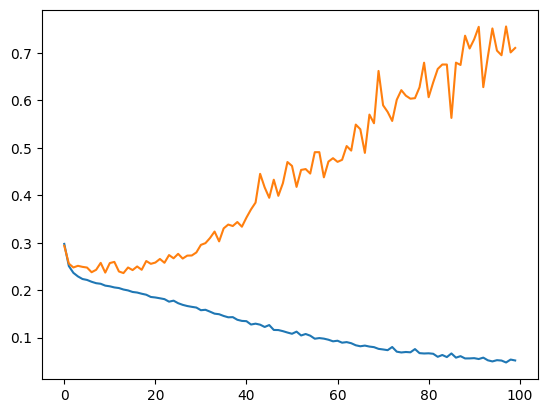

In [ ]:
#Checking the loss plot for the training & validation/testing set
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

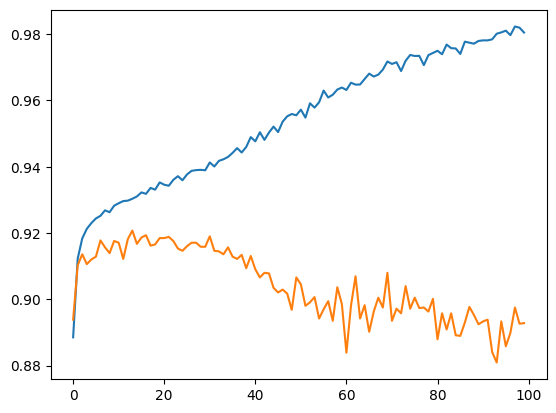

In [ ]:
#Checking the loss plots for the training & validation/testing set
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')

In [ ]:
T=0.5
y_pred = nn_model.predict(X_test)
y_pred_bool = y_pred>=T
cm = confusion_matrix(y_test, y_pred_bool)
print(" Predicted Label")
print(cm)

179/179 [==============================] - 0s 2ms/step
 Predicted Label
[[4187  245]
 [ 369  927]]


Looks like we're overfitting our model. Let's add dropout layers to possibly help, and then rerun the whole thing.

In [ ]:
i = Input(shape=np.shape(X_train)[1])
x = Dense(256, activation='relu')(i)
x = Dropout(.25)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(.25)(x)
x = Dense(16, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

nn_model2 = Model(i, x)
nn_model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense_6 (Dense)             (None, 256)               5888      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0   

In [ ]:
#Compiling & fitting the model
nn_model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])
r = nn_model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
716/716 [==============================] - 5s 4ms/step - loss: 0.3414 - acc: 0.8698 - val_loss: 0.2841 - val_acc: 0.8968
Epoch 2/100
716/716 [==============================] - 3s 4ms/step - loss: 0.2838 - acc: 0.9004 - val_loss: 0.2792 - val_acc: 0.9000
Epoch 3/100
716/716 [==============================] - 5s 6ms/step - loss: 0.2692 - acc: 0.9062 - val_loss: 0.2619 - val_acc: 0.9068
Epoch 4/100
716/716 [==============================] - 3s 4ms/step - loss: 0.2580 - acc: 0.9094 - val_loss: 0.2597 - val_acc: 0.9097
Epoch 5/100
716/716 [==============================] - 3s 4ms/step - loss: 0.2522 - acc: 0.9138 - val_loss: 0.2577 - val_acc: 0.9113
Epoch 6/100
716/716 [==============================] - 3s 4ms/step - loss: 0.2454 - acc: 0.9152 - val_loss: 0.2471 - val_acc: 0.9129
Epoch 7/100
716/716 [==============================] - 4s 5ms/step - loss: 0.2422 - acc: 0.9160 - val_loss: 0.2483 - val_acc: 0.9131
Epoch 8/100
716/716 [==============================] - 4s 5ms/step - 

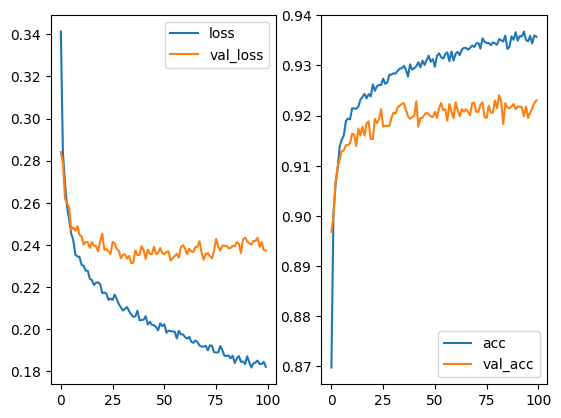

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

In [ ]:
T=0.5
y_pred = nn_model2.predict(X_test)
y_pred_bool = y_pred>=T
cm = confusion_matrix(y_test, y_pred_bool)
print(" Predicted Label")
print(cm)

179/179 [==============================] - 0s 1ms/step
 Predicted Label
[[4382   50]
 [ 391  905]]


Looks like we saw an improvement by adding dropout layers, let's see what the model score is

In [ ]:
nn_class_score = r.history['val_acc'][-1]
print("Final accuracy is", nn_class_score)

Final accuracy is 0.9230097532272339


#Comparing model scores

In [ ]:
score_list = [logreg_class_score,rf_class_score,nb_class_score, svm_class_score, svmrbf_class_score,
              nn_class_score]
print(max(score_list))
print(score_list.index(max(score_list)))

0.928945530726257
1


Looks like our random forest classifier was the best of the group, with around a 93% accuracy.